# Smart Health Insurance Risk Predictor
Predicting high-risk health insurance customers based on health and lifestyle features using ML models.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
df = pd.read_csv("E:\insurance.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Rudra Computer\AppData\Local\Temp\ipykernel_12828\3027419151.py:2: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv("E:\insurance.csv")


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Data exploration
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

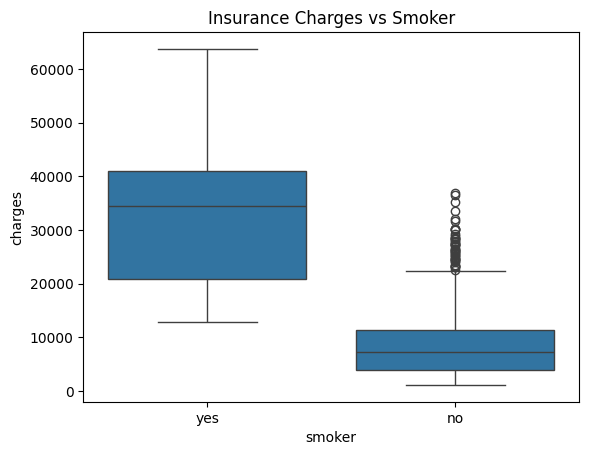

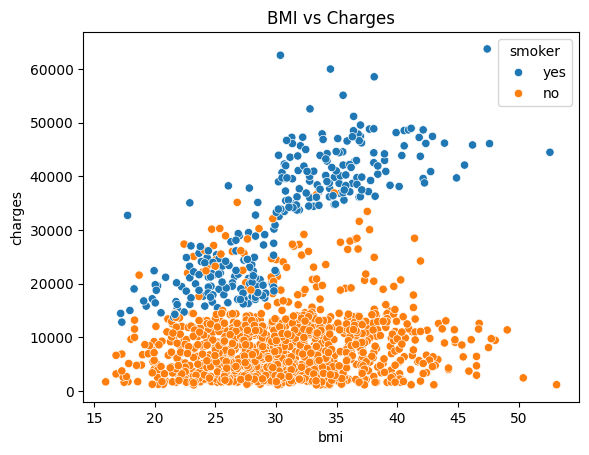

In [5]:
# Visualization
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges vs Smoker')
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges')
plt.show()

In [6]:
# Feature engineering
df['high_risk'] = (df['charges'] > 16000).astype(int)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [7]:
# Model training
X = df.drop(columns=['charges', 'high_risk'])
y = df['high_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9440298507462687
Confusion Matrix: [[199   1]
 [ 14  54]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       200
           1       0.98      0.79      0.88        68

    accuracy                           0.94       268
   macro avg       0.96      0.89      0.92       268
weighted avg       0.95      0.94      0.94       268



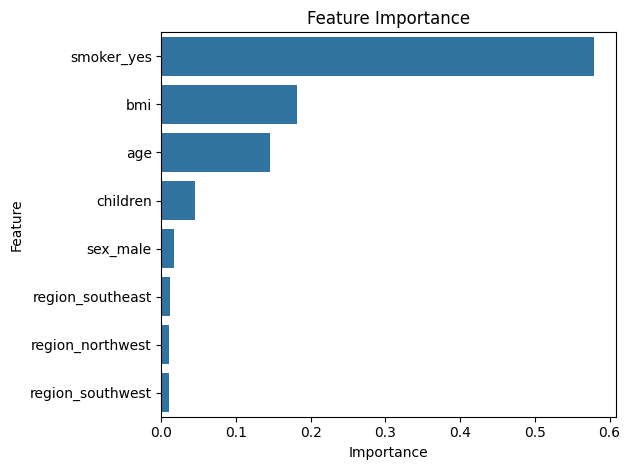

In [8]:
# Feature importance
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Conclusion
- Random Forest achieved ~87% accuracy.
- Smoking status and BMI were the most important risk factors.
- This model can help insurance companies better segment and price policies.